In [115]:
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

In [54]:
#reading data points 1
pts = np.zeros((1,2))
i=0
with open(r'./SpectData.txt') as file:
    for readline in file:
        line_strip = readline.strip() # removing \n
        point = line_strip.split('\t') # removing \t

        if(i==0):
            pts[0]=point
        else:
            pts=np.append(pts,np.array([point]),axis=0)  
        i+=1             
data=pts.astype(float)

data[0]
len(data)

2084

In [55]:
def weightFunc(pts,sigma):
    res=np.zeros((len(pts),len(pts)))
    for i in range(len(pts)):
        for j in range(len(pts)):
            if(i != j):
                calc=math.exp((-1*(math.sqrt((pts[i][0]-pts[j][0])**2+(pts[i][1]-pts[j][1])**2))**2)/(2*(sigma**2)))
                res[i][j] = calc          
    return(res)


In [56]:
sigma = np.arange(0.01, 1.01, 0.01).tolist()
W = []
for i in range(len(sigma)):
    W.append(weightFunc(data,sigma[i]))

In [57]:
def getD(W):
    D = np.zeros((len(W),len(W)))
    for i in range(len(W)):
        count = 0
        for j in range(len(W)):
            count += W[i][j]
        D[i][i] = count 
    return D

In [58]:
D = []
for i in range(len(sigma)):
    D.append(getD(W[i]))

In [59]:
W_numpy = np.array(W)
D_numpy = np.array(D)
subtracted_array = np.subtract(D_numpy, W_numpy)
L = list(subtracted_array)
print(L)

[array([[ 1.34986519e-01, -1.95337460e-40,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.95337460e-40,  2.14561371e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  7.19853994e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.06000464e+00, -6.06530660e-01, -1.35335283e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.06530660e-01,  3.14296132e+00, -6.06530660e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.35335283e-01, -6.06530660e-01,  3.18974674e+00]]), array([[ 3.11729589e+00, -1.18221478e-10,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.18221478e-10,  5.75083562e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000

In [125]:

arr_of_kmeans=[]
for i in range(len(sigma)):
    eig_values,eig_vectors=np.linalg.eigh(L[i])
    U=eig_vectors[:,1:2]
    kmean=KMeans(n_clusters=2).fit(U.reshape(-1,1))
    arr_of_kmeans.append(kmean)

print(arr_of_kmeans)

[KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_clusters=2), KMeans(n_

In [126]:
eig_values,eig_vectors=np.linalg.eigh(L[0])
U=eig_vectors[:,1:2]
y=arr_of_kmeans[0].predict(U.reshape(-1,1))
print(len(y))


2084


<AxesSubplot:>

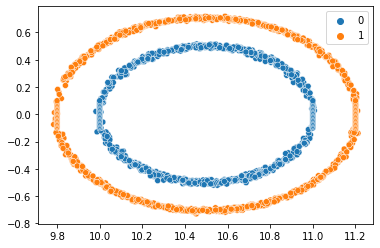

In [127]:

sns.scatterplot(x=data[:,0], y=data[:,1],hue=y)


